In [1]:
from keras.applications.mobilenet import MobileNet
from keras.preprocessing import image
from keras.applications.vgg19 import preprocess_input
import numpy as np
import os
from scipy.misc import imread
import matplotlib.pyplot as plt
%matplotlib inline
import time

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
model = MobileNet(weights='imagenet', include_top=False)

/anaconda3/lib/python3.6/site-packages/keras_applications/mobilenet.py:206: UserWarning: MobileNet shape is undefined. Weights for input shape (224, 224) will be loaded.
  warnings.warn('MobileNet shape is undefined.'


17227776/17225924 [==============================] - 3s 0us/step


In [5]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, None, None, 3)     0         
_________________________________________________________________
conv1 (Conv2D)               (None, None, None, 32)    864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, None, None, 32)    128       
_________________________________________________________________
conv1_relu (ReLU)            (None, None, None, 32)    0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, None, None, 32)    288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, None, None, 32)    128       
__________

In [4]:
total_time=[]

In [45]:
Category = "Men's_Shirts"
mnet_feature_list = []
image_names=[]

start = time.time()
path = '/Users/Student/Downloads/visual_search/models/Data/Semi_train/' + Category
for img_path in os.listdir(path):
    if('.DS_Store' not in os.path.join(path,img_path)):
        image_names.append(img_path)
        img = image.load_img(os.path.join(path,img_path), target_size=(224, 224))
        img_data = image.img_to_array(img)
        img_data = np.expand_dims(img_data, axis=0)
        img_data = preprocess_input(img_data)
        mnet_feature = model.predict(img_data)
        mnet_feature_np = np.array(mnet_feature)
        mnet_feature_list.append(mnet_feature_np.flatten())

mnet_feature_list_np = np.array(mnet_feature_list)
end = time.time()
print("Total Time", end - start)

Total Time 214.83770537376404


In [46]:
total_time.append(end - start)

In [47]:
total_time

[33.92499256134033,
 258.1243200302124,
 571.4326241016388,
 493.93697786331177,
 214.83770537376404]

In [48]:
mnet_feature_list_np.shape

(1057, 50176)

In [49]:
mnet_feature_list_np

array([[0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.8971858, 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       ...,
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ]], dtype=float32)

In [50]:
import pickle

pickled_db_path = "features_mnet/Men's_Shirts.pck"

with open(pickled_db_path, 'wb') as fp:
        pickle.dump(mnet_feature_list_np, fp)
        print("dumped")
fp.close()

dumped


In [51]:
start = time.time()
with open(pickled_db_path, 'rb') as fp:
        #vgg_loaded = pickle.load(fp)
        mnet_loaded = pickle.load(fp)
        print("loaded")
fp.close()

loaded


In [52]:
mnet_loaded.shape

(1057, 50176)

In [14]:
# query_image_path = "C:/Users/SAI SUPRAJA M/Desktop/visual_search/Data/Semi_train/Chiffon/40632_shop_01.jpg"
query_image_path= "11046_shop_01.jpg"
imgq = image.load_img(query_image_path, target_size=(224, 224))
img_dataq = image.img_to_array(imgq)
img_dataq = np.expand_dims(img_dataq, axis=0)
img_dataq = preprocess_input(img_dataq)
mnet_feature_query = model.predict(img_dataq)
mnet_feature_np_query = np.array(mnet_feature_query)
mnet_feature_np_query = mnet_feature_np_query.flatten()

In [15]:
mnet_feature_np_query.shape

(50176,)

In [17]:
from scipy.spatial import distance

similarity = []
count = 0

for i in mnet_loaded:
    count = count+1
    d = distance.cosine(i,mnet_feature_np_query)
    sim = 1-d
    similarity.append((sim,image_names[count-1]))


In [18]:
similarity

[(0.30264583230018616, '11038_shop_01.jpg'),
 (0.26508328318595886, '11039_comsumer_04.jpg'),
 (0.24843721091747284, '11040_comsumer_05.jpg'),
 (0.30376115441322327, '11041_comsumer_01.jpg'),
 (0.3073011040687561, '11042_comsumer_02.jpg'),
 (0.2774180471897125, '11043_comsumer_03.jpg'),
 (0.2696799039840698, '11044_comsumer_08.jpg'),
 (0.3009648025035858, '11045_comsumer_09.jpg'),
 (1.0, '11046_shop_01.jpg'),
 (0.26179951429367065, '11047_comsumer_07.jpg'),
 (0.2982363998889923, '11048_comsumer_13.jpg'),
 (0.2884133458137512, '11049_comsumer_12.jpg'),
 (0.28688719868659973, '11050_comsumer_06.jpg'),
 (0.32447755336761475, '11051_comsumer_10.jpg'),
 (0.34005874395370483, '11052_comsumer_04.jpg'),
 (0.28201231360435486, '11053_comsumer_05.jpg'),
 (0.28892242908477783, '11054_comsumer_11.jpg'),
 (0.22979959845542908, '11055_comsumer_15.jpg'),
 (0.27211475372314453, '11056_comsumer_01.jpg'),
 (0.28917068243026733, '11057_comsumer_14.jpg'),
 (0.2647038698196411, '11058_comsumer_02.jpg'),
 (

In [19]:
def show_img(path):
    img =imread(path, mode="RGB")
    plt.imshow(img)
    plt.show()

Query image ==========================================


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


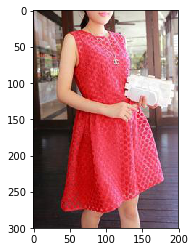

Result images ========================================
similarity 1.0


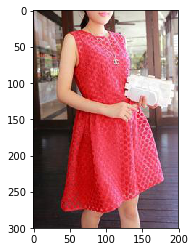

similarity 0.36195090413093567


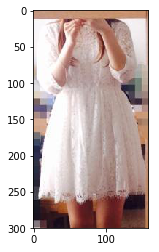

similarity 0.34576404094696045


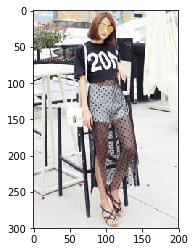

similarity 0.3441852629184723


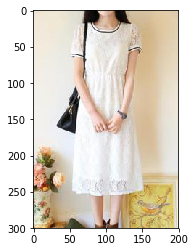

similarity 0.3403339087963104


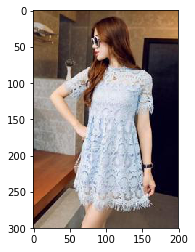

similarity 0.34005874395370483


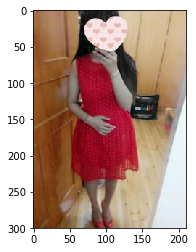

In [20]:
# After sorting images through similarity
des_similarity = sorted(similarity,reverse=True)
des_similarity =des_similarity[:6]
Category = "Lace_Dress"
path = '/Users/Student/Downloads/visual_search/models/Data/Semi_train/' + Category

print ('Query image ==========================================')
show_img(query_image_path)


print ('Result images ========================================')
for i in range(0,len(des_similarity)):
    print("similarity",des_similarity[i][0])
    show_img(path+ "/"+des_similarity[i][1])
    

end = time.time()

In [ ]:
total_time_main = end - start
print("total_time_main", total_time_main)

In [53]:
total_model_time = 0.0
for i in range(0, len(total_time)):
    total_model_time = total_model_time + total_time[i]

print("total_model_time", total_model_time)

total_model_time 1572.2566199302673
